In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('all_agricultural_products_data.csv')

In [3]:
df['volume']=df['volume'].replace(0,df['volume'].mean())

In [4]:
df

,ticker,commodity,date,open,high,low,close,volume
0,CC=F,Cocoa,2000-01-03,840.000000,846.000000,820.000000,830.000000,2426.00000
1,CC=F,Cocoa,2000-01-04,830.000000,841.000000,823.000000,836.000000,1957.00000
2,CC=F,Cocoa,2000-01-05,840.000000,850.000000,828.000000,831.000000,3975.00000
3,CC=F,Cocoa,2000-01-06,830.000000,847.000000,824.000000,841.000000,3454.00000
4,CC=F,Cocoa,2000-01-07,848.000000,855.000000,836.000000,853.000000,5008.00000
...,...,...,...,...,...,...,...,...
30511,SB=F,Sugar,2024-02-16,22.850000,23.389999,22.709999,23.080000,51979.00000
30512,SB=F,Sugar,2024-02-19,22.850000,23.389999,22.709999,23.080000,51979.00000
30513,SB=F,Sugar,2024-02-20,23.000000,23.000000,22.490000,22.750000,46771.00000
30514,SB=F,Sugar,2024-02-21,22.780001,22.930000,22.469999,22.770000,26871.00000


In [5]:
df.isnull().sum() 

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

# MODEL

In [6]:

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Select commodity and desired forecasting period
commodity=input("Enter the commodity: ")
forecast_period = int(input("Enter a forecast period: ")) 

# Filter data for selected commodity
df_commodity = df[df['commodity'] == commodity]

# Sort values by date
df_commodity.sort_values(by='date', inplace=True)

# Reset index
df_commodity.reset_index(drop=True, inplace=True)

# Feature engineering: Extracting day, month, and year from Date
df_commodity['Day'] = df_commodity['date'].dt.day
df_commodity['Month'] = df_commodity['date'].dt.month
df_commodity['Year'] = df_commodity['date'].dt.year

#what to predict??

prediction=input("Enter target variable: ")

# Splitting data into features (X) and target (y)
X = df_commodity[['Day', 'Month', 'Year']]
y = df_commodity[prediction]

# Train the Random Forest Regressor model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Generate future dates for forecasting
str_date = input("Enter starting date: ")
date_format='%Y-%m-%d'
last_date=datetime.strptime(str_date,date_format)

future_dates = pd.date_range(start=last_date, periods=forecast_period, freq='D')

# Feature engineering for future dates
future_df = pd.DataFrame({
    #'Date': future_dates,
    'Day': future_dates.day,
    'Month': future_dates.month,
    'Year': future_dates.year
})

# Predict prices and associated probabilities for future dates
predicted_prices = model.predict(future_df[['Day', 'Month', 'Year']])

std_dev = np.std([tree.predict(future_df[['Day', 'Month', 'Year']]) for tree in model.estimators_], axis=0)
margin_of_error = 1.96 * std_dev  # 95% confidence interval
lower_prediction_interval = predicted_prices - margin_of_error
upper_prediction_interval = predicted_prices + margin_of_error


# Combine future dates, predicted prices, and prediction intervals
forecast_df = pd.DataFrame({
    'Commodity':commodity,
    'Date': future_dates,
    'Predicted_'+prediction+'_Price': predicted_prices,
    'Lower_Prediction_Interval': lower_prediction_interval,
    'Upper_Prediction_Interval': upper_prediction_interval
})

# Display forecasted prices with associated probabilities
forecast_df


Enter the commodity: Sugar
Enter a forecast period: 24
Enter target variable: high
Enter starting date: 1998-06-13


,Commodity,Date,Predicted_high_Price,Lower_Prediction_Interval,Upper_Prediction_Interval
0,Sugar,1998-06-13,8.8023,8.516504,9.088095
1,Sugar,1998-06-14,8.8660,8.590259,9.141741
2,Sugar,1998-06-15,8.7669,8.468713,9.065087
3,Sugar,1998-06-16,8.5674,8.153876,8.980924
4,Sugar,1998-06-17,8.5342,8.203730,8.864670
5,Sugar,1998-06-18,8.5612,8.369214,8.753186
6,Sugar,1998-06-19,8.6245,8.508169,8.740832
7,Sugar,1998-06-20,8.6605,8.553456,8.767545
8,Sugar,1998-06-21,8.7227,8.593077,8.852323
9,Sugar,1998-06-22,8.7279,8.631072,8.824729


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.2058174629480961
Mean Squared Error (MSE): 0.09119491945465592
R-squared (R2): 0.9975761961219792


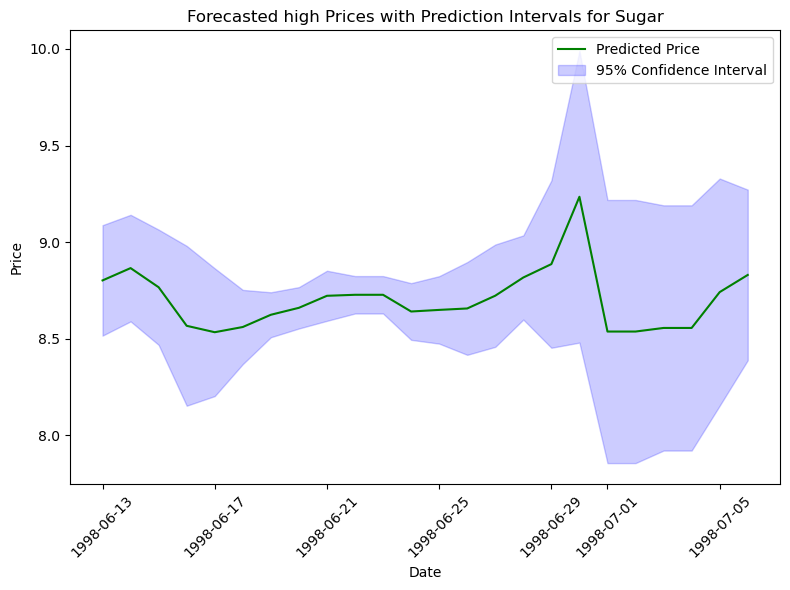

In [8]:
import matplotlib.pyplot as plt

# Plot forecasted prices
plt.figure(figsize=(8, 6))

# Plotting predicted prices
plt.plot(forecast_df['Date'], forecast_df['Predicted_'+prediction+'_Price'], color='green', label='Predicted Price')

# Plotting prediction intervals
plt.fill_between(forecast_df['Date'], forecast_df['Lower_Prediction_Interval'], forecast_df['Upper_Prediction_Interval'], color='blue', alpha=0.2, label='95% Confidence Interval')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Forecasted {prediction} Prices with Prediction Intervals for '+commodity)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


In [50]:
grouped_df

,commodity,volume
5,Sugar,2.747480e+08
1,Coffee,5.928452e+07
0,Cocoa,5.507510e+07
2,Cotton,5.209953e+07
4,Random Length Lumber,7.833940e+06
3,Orange Juice,8.653091e+05


Enter a forecast period: 3000
Enter starting date (YYYY-MM-DD): 2026-04-30
The most in-demand commodity for the given forecast period based on volume traded is: Sugar


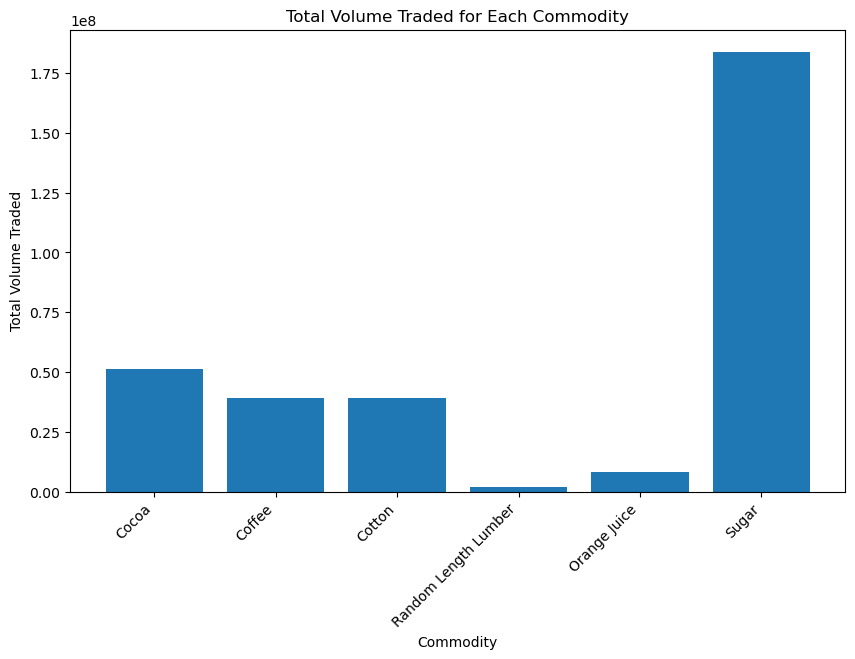

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Select desired forecasting period
forecast_period = int(input("Enter a forecast period: ")) 

# Get starting date
str_date = input("Enter starting date (YYYY-MM-DD): ")
date_format = '%Y-%m-%d'
start_date = pd.to_datetime(str_date, format=date_format)

# What to predict?
prediction = 'volume'

# Dictionary to store total volume traded for each commodity
total_volume_traded = {}

# Loop through each commodity
for commodity in df['commodity'].unique():
    # Filter data for selected commodity
    df_commodity = df[df['commodity'] == commodity]

    # Sort values by date
    df_commodity.sort_values(by='date', inplace=True)

    # Reset index
    df_commodity.reset_index(drop=True, inplace=True)

    # Generate future dates for forecasting
    last_date = df_commodity['date'].max()
    future_dates = pd.date_range(start=last_date, periods=forecast_period, freq='D')

    # Feature engineering: Extracting day, month, and year from Date
    df_commodity['Day'] = df_commodity['date'].dt.day
    df_commodity['Month'] = df_commodity['date'].dt.month
    df_commodity['Year'] = df_commodity['date'].dt.year

    # Splitting data into features (X) and target (y)
    X = df_commodity[['Day', 'Month', 'Year']]
    y = df_commodity[prediction]

    # Train the Random Forest Regressor model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model2 = RandomForestRegressor(n_estimators=100, random_state=42)
    model2.fit(X_train, y_train)

    # Feature engineering for future dates
    future_df = pd.DataFrame({
        'Day': future_dates.day,
        'Month': future_dates.month,
        'Year': future_dates.year
    })

    # Predict volume traded for future dates
    predicted_volume_traded = model2.predict(future_df[['Day', 'Month', 'Year']])

    # Sum predicted volume traded for the commodity
    total_volume_traded[commodity] = np.sum(predicted_volume_traded)

# Determine the commodity with the highest total volume traded
most_in_demand_commodity = max(total_volume_traded, key=total_volume_traded.get)
print("The most in-demand commodity for the given forecast period based on volume traded is:", most_in_demand_commodity)

# Plot the total volume traded for each commodity
plt.figure(figsize=(10, 6))
plt.bar(total_volume_traded.keys(), total_volume_traded.values())
plt.xlabel('Commodity')
plt.ylabel('Total Volume Traded')
plt.title('Total Volume Traded for Each Commodity')
plt.xticks(rotation=45, ha='right')
plt.show()
